#### Formula for Linear Congruential Generator (LCG):

$$
X_{k+1} = (a \cdot X_k + c) \mod m
$$

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
class LCG:
    def __init__(self, seed=0):
        self.m = 2**31 - 1
        self.a = 16807
        self.c = 0
        self.state = seed % self.m # this is the current variable of Xk
    
    def rand01(self):
        self.state = (self.a * self.state + self.c) % self.m
        ## return in the range of [0, 1)
        return self.state / self.m
    
    def uniform(self, upper, lower):
        ## scale to [lower, upper)
        return lower + (upper - lower) * self.rand01()
    
    def normal(self, mu, sigma):
        u1 = self.rand01()
        u2 = self.rand01()

        z1 = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
        # z1 = math.sqrt(-2 * math.log(u1)) * math.sin(2 * math.pi * u2)

        ## scale to a general normal distribution with a given mu and sigma
        x = mu + z1 * sigma
        return x

    def poisson(self, lamb):
        L = math.exp(-lamb)
        k = 0
        p = 1
        while (p > L):
            k += 1
            p *= self.rand01()
        return k - 1

#### Generate and plot random numbers within a range which resemble the uniform distribution

In [3]:
n = 2000
upper, lower = 5.0, 100.0

(array([197., 202., 198., 193., 182., 212., 200., 212., 184., 220.]),
 array([ 5.00021553, 14.49893155, 23.99764757, 33.49636358, 42.9950796 ,
        52.49379562, 61.99251164, 71.49122766, 80.98994368, 90.4886597 ,
        99.98737572]),
 <BarContainer object of 10 artists>)

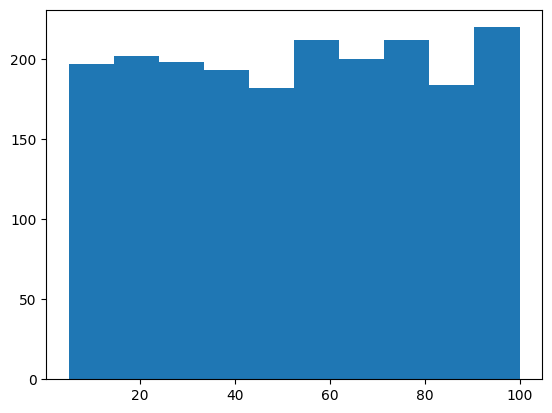

In [4]:
rng = LCG(seed=42)
data = [rng.uniform(upper, lower) for _ in range(n)]
## plot a histogram

plt.hist(data, bins=10)

#### Generate and plot random numbers with a given mean and standard deviation from a normal distribution

In [5]:
mu = 0
sigma = 1
normal_data = [rng.normal(mu, sigma) for _ in range(n)]

(array([  1.,   0.,   3.,   9.,  32.,  59.,  94., 136., 218., 231., 288.,
        273., 237., 150., 117.,  73.,  44.,  21.,  12.,   2.]),
 array([-3.74359271, -3.39543064, -3.04726857, -2.69910651, -2.35094444,
        -2.00278237, -1.6546203 , -1.30645823, -0.95829616, -0.6101341 ,
        -0.26197203,  0.08619004,  0.43435211,  0.78251418,  1.13067625,
         1.47883831,  1.82700038,  2.17516245,  2.52332452,  2.87148659,
         3.21964866]),
 <BarContainer object of 20 artists>)

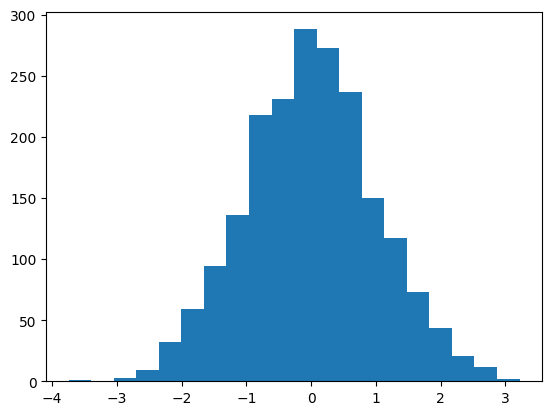

In [6]:
plt.hist(normal_data, bins=20)

In [7]:
round(np.mean(normal_data)), round(np.std(normal_data))

(0, 1)

#### Poisson Distribution

In [8]:
poisson_data = [rng.poisson(lamb=10) for _ in range(n)]

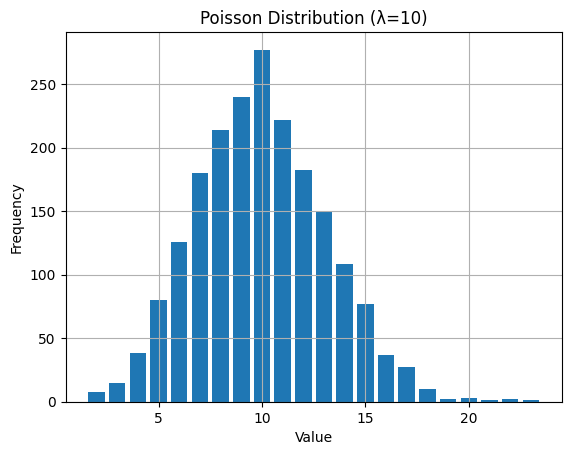

In [9]:
import matplotlib.pyplot as plt

plt.hist(poisson_data, bins=range(min(poisson_data), max(poisson_data)+1), align='left', rwidth=0.8)
plt.title("Poisson Distribution (λ=10)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()